# <b><u> Project Title : Seoul Bike Sharing EDA </u></b>

## <b> Problem Description </b>

### To Assess Bike Availability And Distribution 
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. 
One main operational challenge is the redistribution logistics of bikes to maintain availability across the city. Solving this issue would allow rental bikes to be available to the public at the right time, lessening their waiting time. 
The following questions will be answered, which will provide impactful insights and recommendations for this problem

1. How does bike rental demand vary throughout the day?
2. How does bike rental demand vary with Season, Holiday, Functioning Day, etc?
3. Does bike rental demand have any correlation with any other numerical features?

## <b> Data Information </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>

### <b>Attribute Information: </b>

- Date : year-month-day
- Rented Bike count : Count of bikes rented at each hour
- Hour : Hour of the day (1-24)
- Temperature : Temperature in Celsius
- Humidity - relative humidity in % (amount of water vapour at given T / Total amount of water vapour at that T)
- Windspeed - m/s
- Visibility - 10m 
- Dew point temperature - Celsius 
- Solar radiation - MJ/m2
- Rainfall - mm
- Snowfall - cm
- Seasons - Winter, Spring, Summer, Autumn
- Holiday - Holiday/No holiday
- Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [308]:
# importing numpy and pandas
import numpy as np 
import pandas as pd

# Importing Visualization Libraries
import matplotlib.pyplot as plt 
import seaborn as sns

# Supress warning for ignore warnings 
import warnings
warnings.filterwarnings("ignore")

## <b>Loading the Dataset</b>

In [190]:
sb_df = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1')
sb_df.shape

(8760, 14)

In [191]:
sb_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [192]:
sb_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [193]:
sb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [194]:
# descriptive statistics for all columns
sb_df.describe(include='all').transpose()

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

## <b>Data preprocessing</b>

In [195]:
sb_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [196]:
sb_df.duplicated().sum()

0

In [197]:
# converting date column dtype object to date 
sb_df['Date'] = pd.to_datetime(sb_df['Date'], format='%d/%m/%Y')

In [198]:
# extract date and append day of week, month and year to dateframe
# convert year to object to compare against bike rental counts
sb_df['day_of_week'] = sb_df['Date'].dt.day_name()
sb_df["month"] = sb_df['Date'].dt.month_name()   
sb_df["year"] = sb_df['Date'].map(lambda x: x.year).astype("object") 

In [199]:
# drop the Date column
sb_df.drop(columns=['Date'],inplace=True)

In [200]:
sb_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  \
0           0.0            0.0  Winter  No Holiday             Yes   
1           0.0            0.0  Winter  No Holiday             Yes   
2           0.0            0.0  Winter  No Holiday             Yes   
3           0.0            0.0  Winter  No Holiday             Yes   
4           0.0            0.0  Winter  No Holiday             Yes   

  day_of_week     month  year  
0      Friday  December  2017  
1      Friday  December  2017  
2      Friday  December  2017  
3      Friday  December  2017  
4      Friday  December  2017

In [201]:
# using Hour as the Timestamp, converted to object
sb_df['Hour']=sb_df['Hour'].astype('object')

In [202]:
numeric_features= sb_df.select_dtypes(exclude='object')
categorical_features=sb_df.select_dtypes(include='object')

In [203]:
categorical_features.head()

Hour Seasons     Holiday Functioning Day day_of_week     month  year
0    0  Winter  No Holiday             Yes      Friday  December  2017
1    1  Winter  No Holiday             Yes      Friday  December  2017
2    2  Winter  No Holiday             Yes      Friday  December  2017
3    3  Winter  No Holiday             Yes      Friday  December  2017
4    4  Winter  No Holiday             Yes      Friday  December  2017

In [204]:
numeric_features.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  
0           0.0            0.0  
1           0.0            0.0  
2           0.0            0.0  
3           0.0            0.0  
4           0.0            0.0

## <b> 1. How does bike rental demand vary throughout the day?</b>

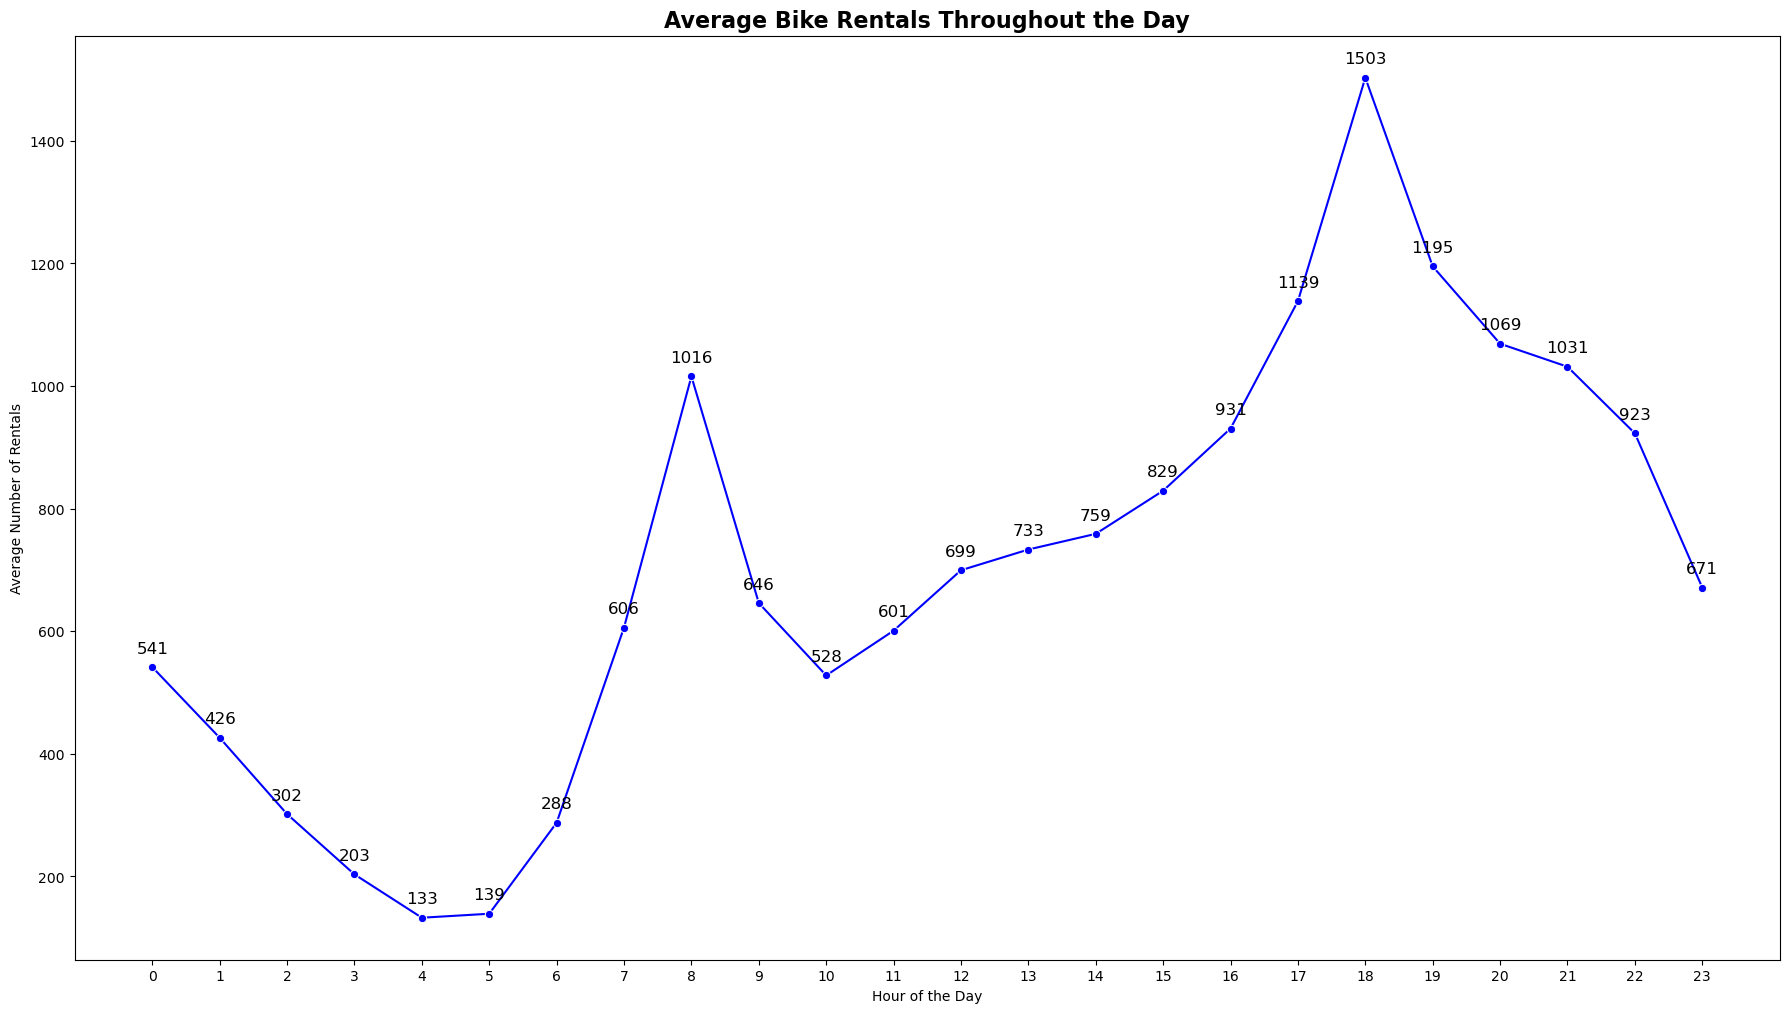

In [355]:
hourly_rentals = sb_df.groupby('Hour')['Rented Bike Count'].mean().reset_index()

# Plotting
plt.figure(figsize=(22, 12))
ax = sns.lineplot(x='Hour', y='Rented Bike Count', data=hourly_rentals, marker='o', color='b')
for i in range(len(hourly_rentals)):
    ax.annotate(
        f'{hourly_rentals["Rented Bike Count"].iloc[i]:.0f}', 
        (hourly_rentals['Hour'].iloc[i], hourly_rentals['Rented Bike Count'].iloc[i]), 
        textcoords="offset points", 
        xytext=(0,10), 
        ha='center', 
        fontsize=12,
        color='black'
    )
plt.title('Average Bike Rentals Throughout the Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Rentals')
plt.xticks(ticks=range(24))  # Ensure all hours are shown
plt.show()

<b> Spikes in average demand during office start/end hours

highest average demand at 6pm.  

## <b> 2. How does bike rental demand vary with different categorical features?</b>

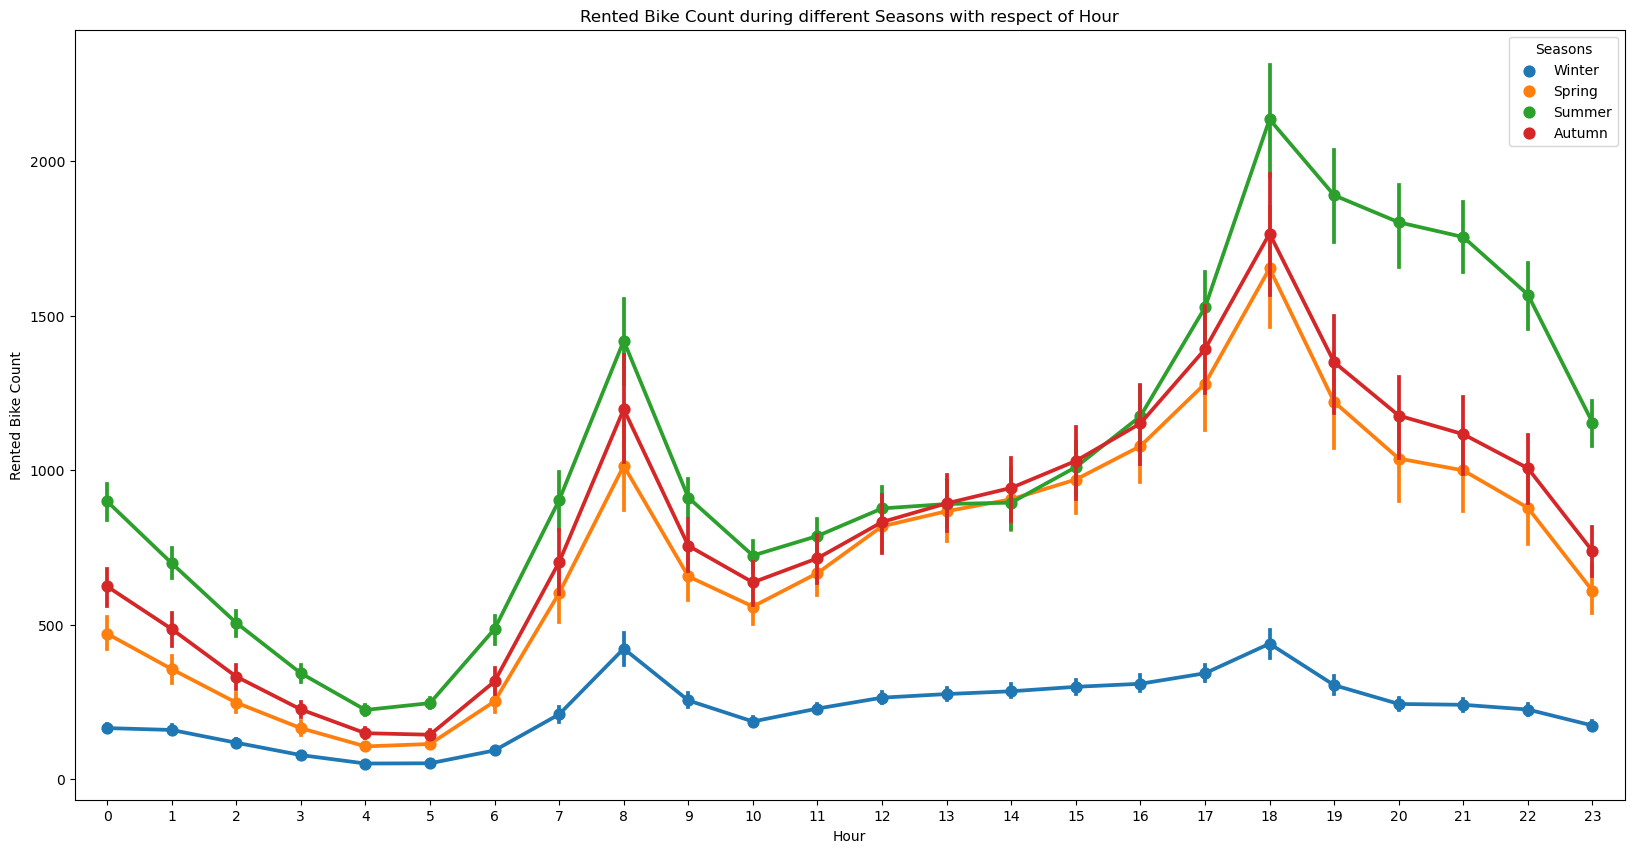

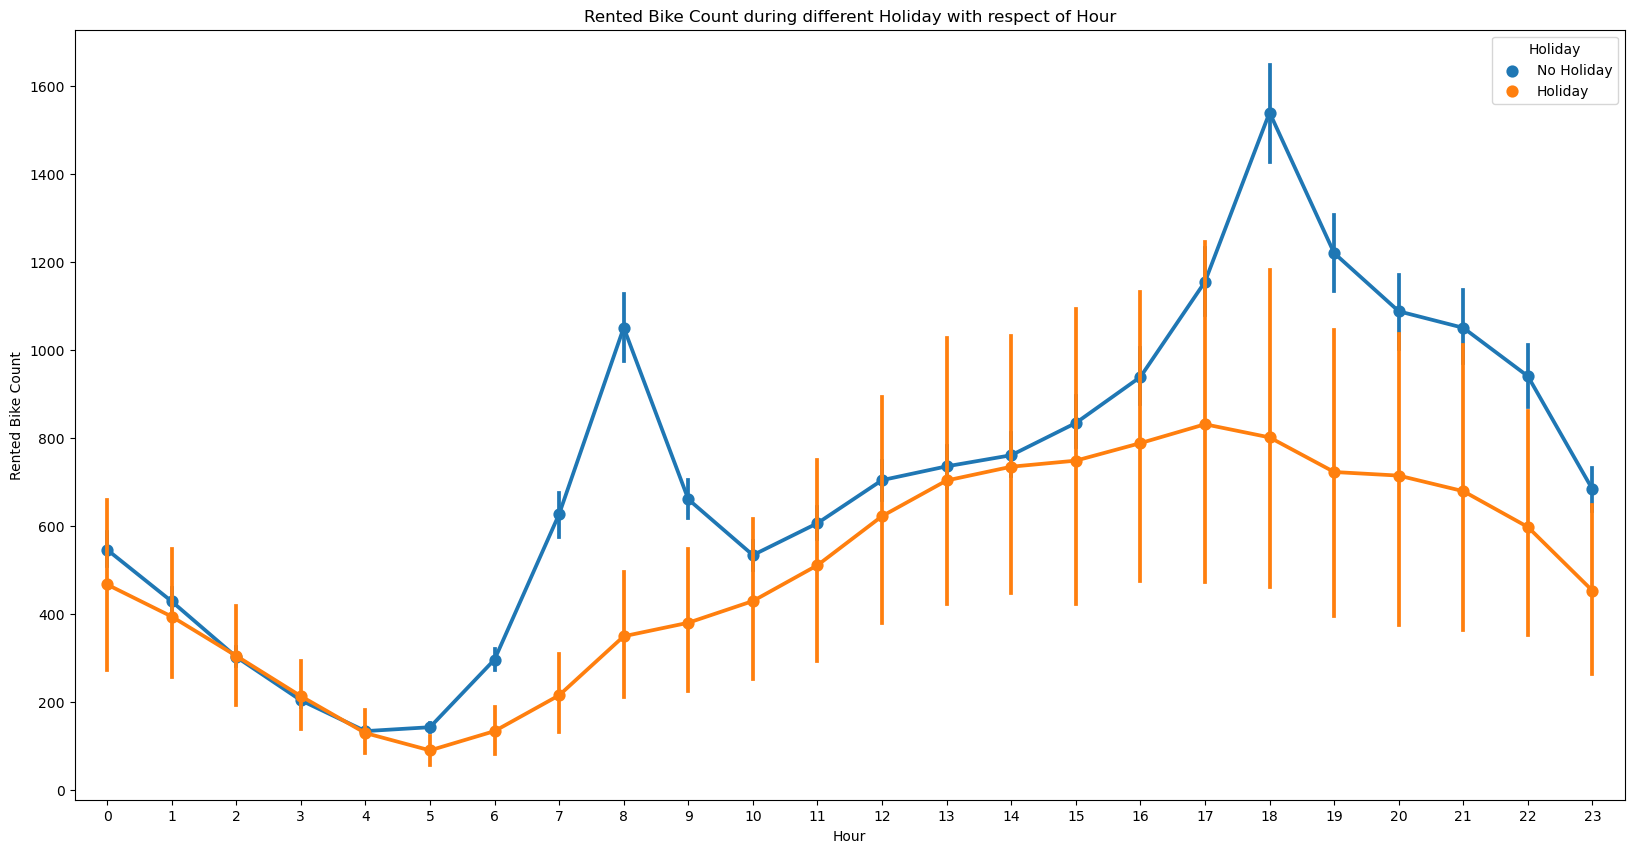

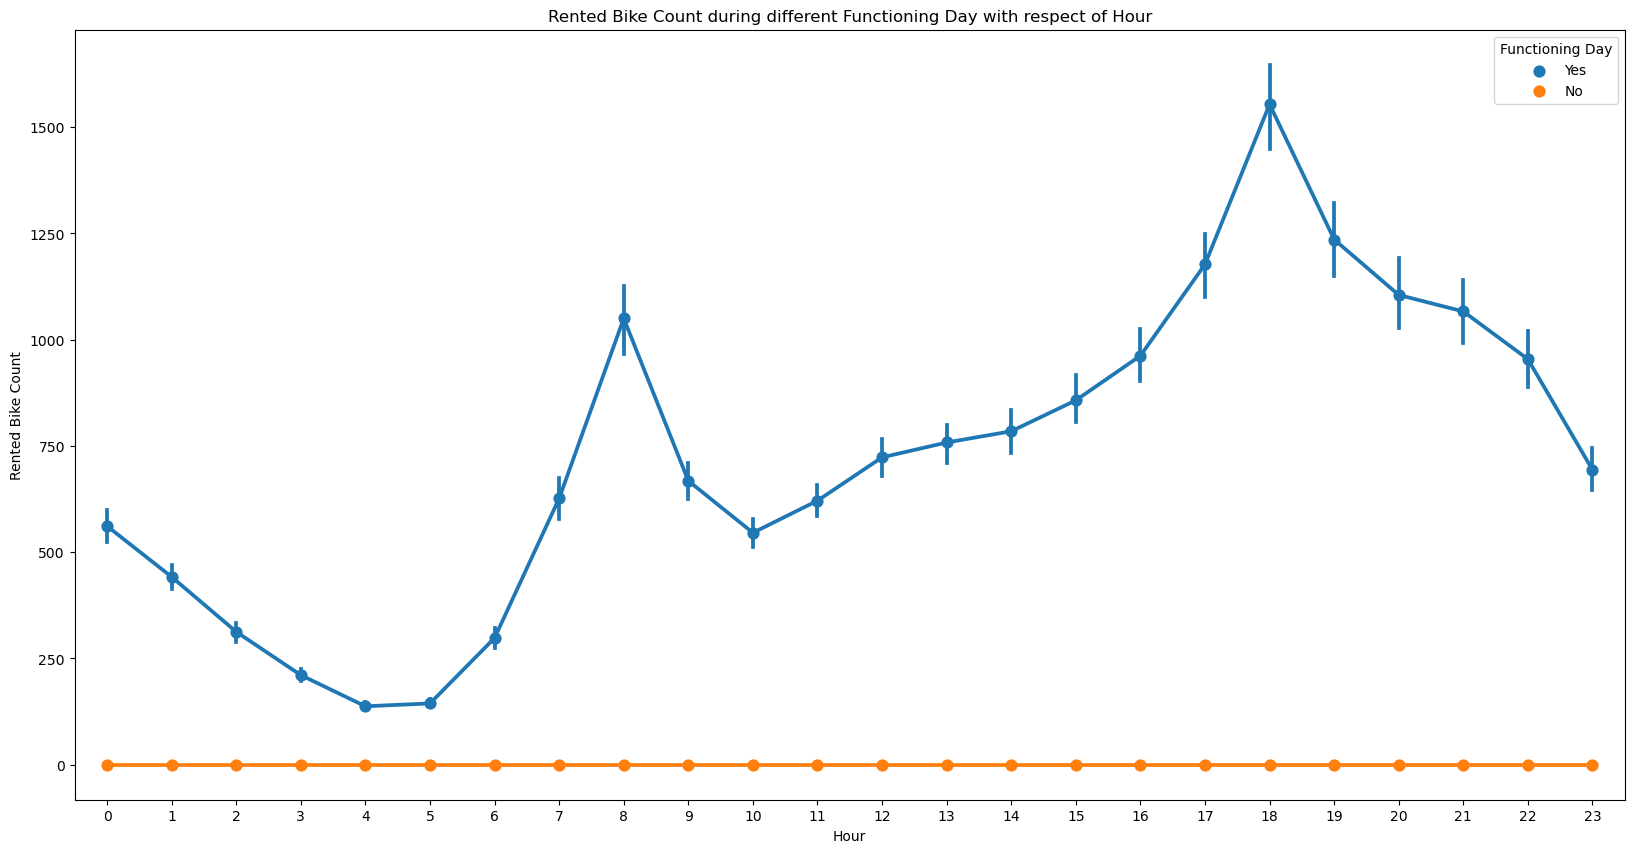

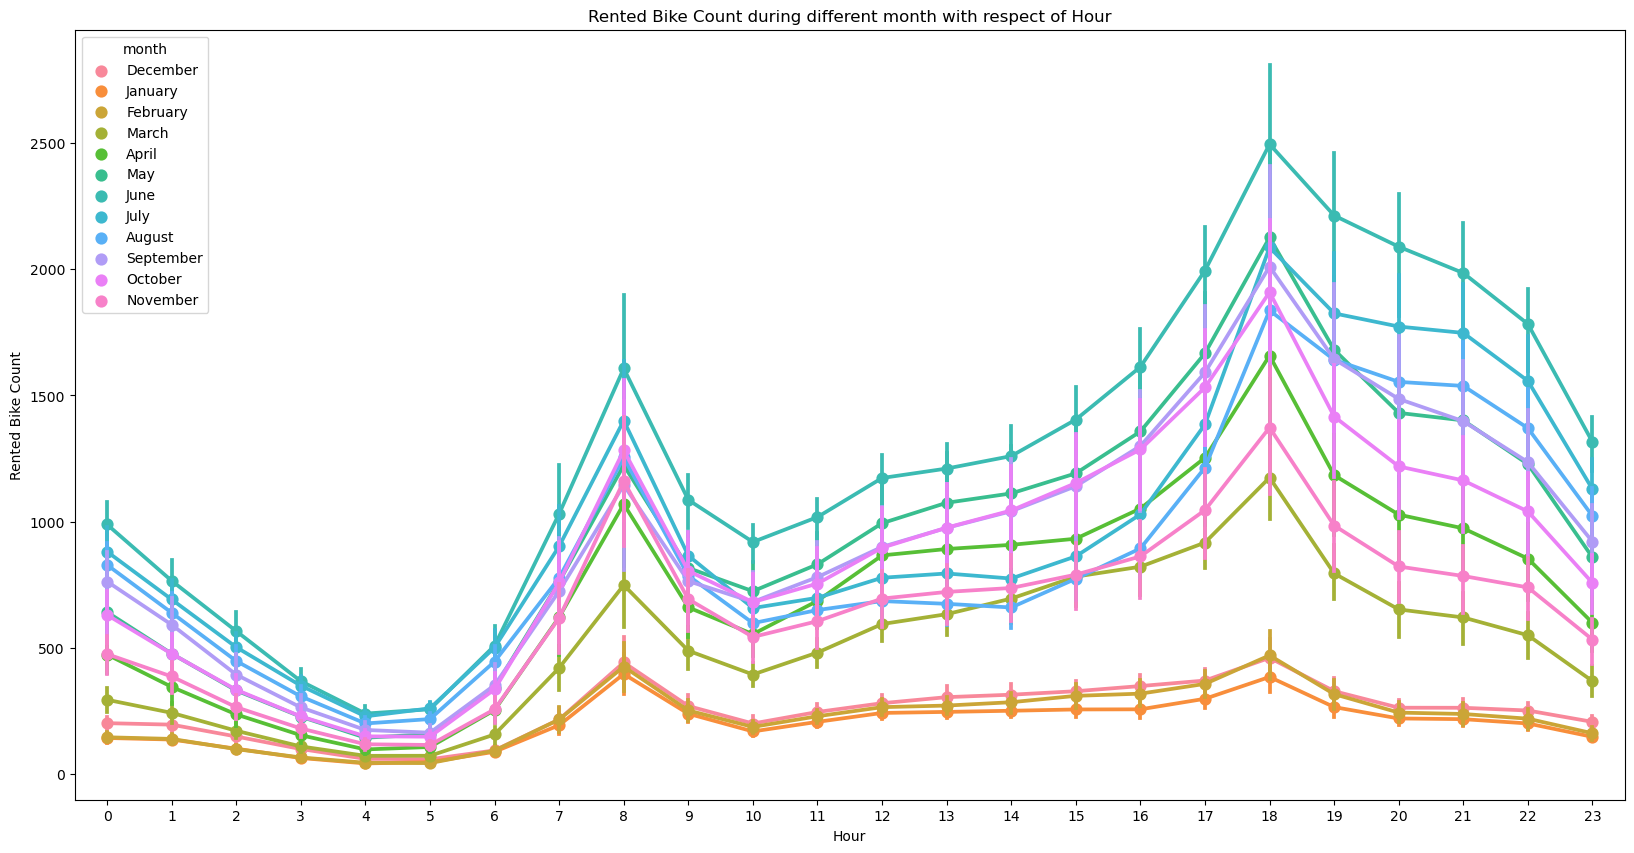

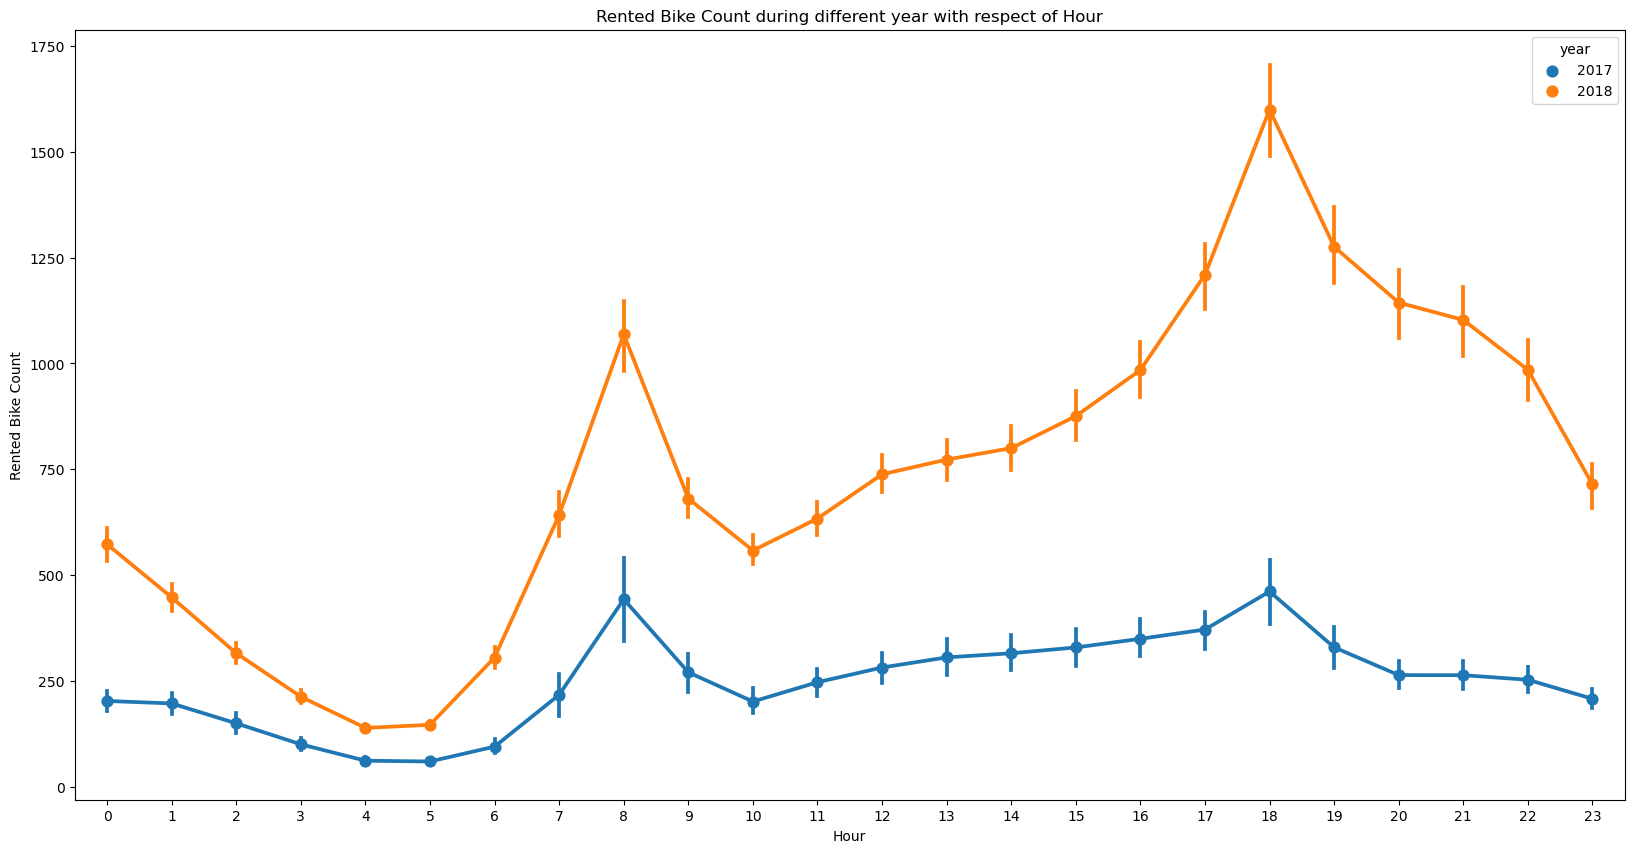

In [242]:
# created point plots with Rented Bike Count during different categorical features with respect to Hour
for category in categorical_features.columns:
    if category == 'Hour':
        pass
    else:
        plt.figure(figsize=(20,10))
        sns.pointplot(x=sb_df["Hour"],y=sb_df['Rented Bike Count'],hue=sb_df[category])
        plt.title(f"Rented Bike Count during different {category} with respect of Hour")
        plt.show()

In [207]:
mean_winter_temperature = sb_df[sb_df['Seasons'] == 'Winter']['Temperature(°C)'].mean()
print(f'{mean_winter_temperature:.2f}')

-2.54


<b> Observation 

From all these pointplot we have observed a lot from every column like :

*Season*

For rental bike demand during different seasons, there is noticeably low demand during winter. This is because it is too cold to be biking as average Temperature falls to -2.54°C during this period.

*Holiday*

For rental bike demand during holidays, demand is lower during holidays and higher during working days. A substantial amount of people rent bikes to commute to their workplace during workings days. This is evident by spikes in demand at 8am and 6pm during working days, which are regular times to travel to work or get off work.

*Functioning Day*

For rental bike demand during functioning/non-functioning hours, there is naturally no demand during non-functioning hours. 

*Days of week*

For rental bike demand during different days of the week, weekends follows a distinct pattern where demands starts to increase starting from 5am. Bike rental demands are high during afternoons and evenings, and extremely popular during evening times. For weekdays, demands are high during office hours. **This can be explored further by aggregating the days to weekdays and weekends.**

*month*

For rental bike demand during different months, bike rental demand is low in December January & Febuary. It is too cold in these months to be biking.

*year*

Comparing demand during 2017 and 2018, demand has greatly increased in 2018 as compared to 2017. Demand could have increased from organic growth by word-of-mouth or increased awareness due to some marketing campaign that occurred in 2018.

In [209]:
# Converting days of weeks in Two variable from Monaday to Friday in Weekdays and Saturday and Sunday to Weekend
sb_df['week'] = sb_df['day_of_week'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

In [210]:
sb_df.week.value_counts()

week
Weekdays    6264
Weekend     2496
Name: count, dtype: int64

Text(0.5, 1.0, 'Rented Bike Count during weekday and weekend with respect of Hour')

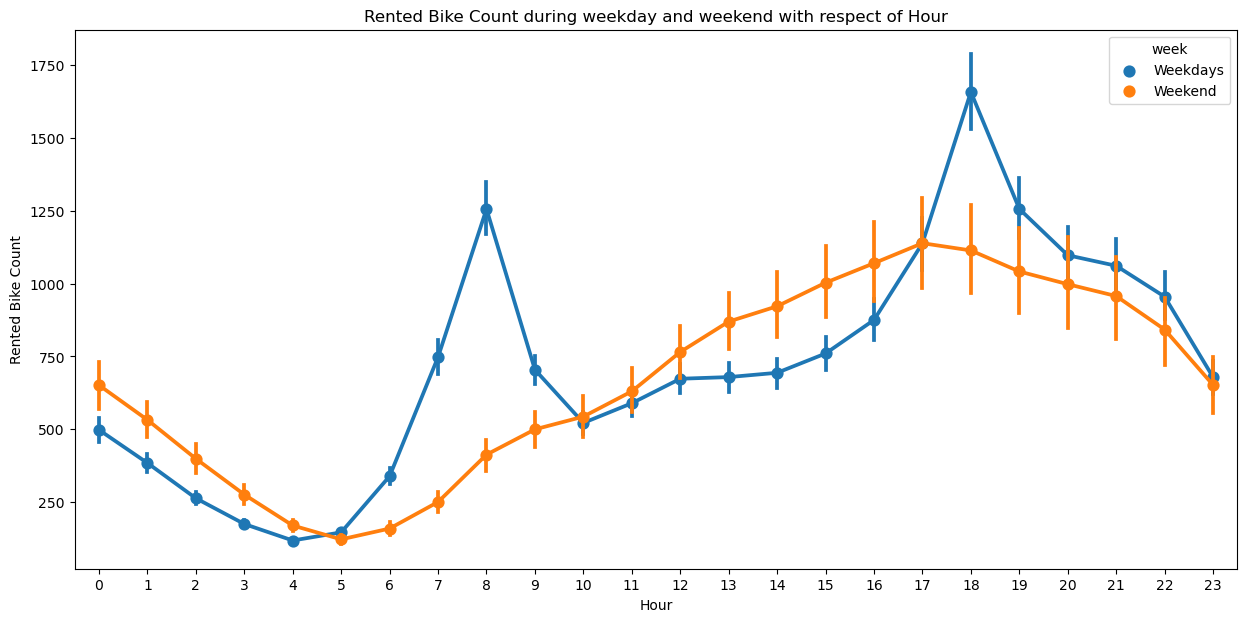

In [211]:
plt.figure(figsize=(15,7))
sns.pointplot(x=sb_df["Hour"],y=sb_df['Rented Bike Count'],hue=sb_df['week'])
plt.title("Rented Bike Count during weekday and weekend with respect of Hour")

In [212]:
# dropping the days of week column from df and from categorical feature 
sb_df.drop(columns=['day_of_week'], inplace=True)
categorical_features.drop(columns=['day_of_week'], inplace=True)

In [288]:
# using for loop and getting all value Counts in percentage of categorical features
for category in categorical_features.columns:
    print('feature name : ', category)
    percentage = sb_df[category].value_counts(normalize=True) * 100
    print(percentage.apply(lambda x: f'{x:.2f}%'))
    print('\n')

feature name :  Hour
Hour
0     4.17%
1     4.17%
22    4.17%
21    4.17%
20    4.17%
19    4.17%
18    4.17%
17    4.17%
16    4.17%
15    4.17%
14    4.17%
13    4.17%
12    4.17%
11    4.17%
10    4.17%
9     4.17%
8     4.17%
7     4.17%
6     4.17%
5     4.17%
4     4.17%
3     4.17%
2     4.17%
23    4.17%
Name: proportion, dtype: object


feature name :  Seasons
Seasons
Spring    25.21%
Summer    25.21%
Autumn    24.93%
Winter    24.66%
Name: proportion, dtype: object


feature name :  Holiday
Holiday
No Holiday    95.07%
Holiday        4.93%
Name: proportion, dtype: object


feature name :  Functioning Day
Functioning Day
Yes    96.63%
No      3.37%
Name: proportion, dtype: object


feature name :  month
month
December     8.49%
January      8.49%
March        8.49%
May          8.49%
July         8.49%
August       8.49%
October      8.49%
April        8.22%
June         8.22%
September    8.22%
November     8.22%
February     7.67%
Name: proportion, dtype: object


feature na

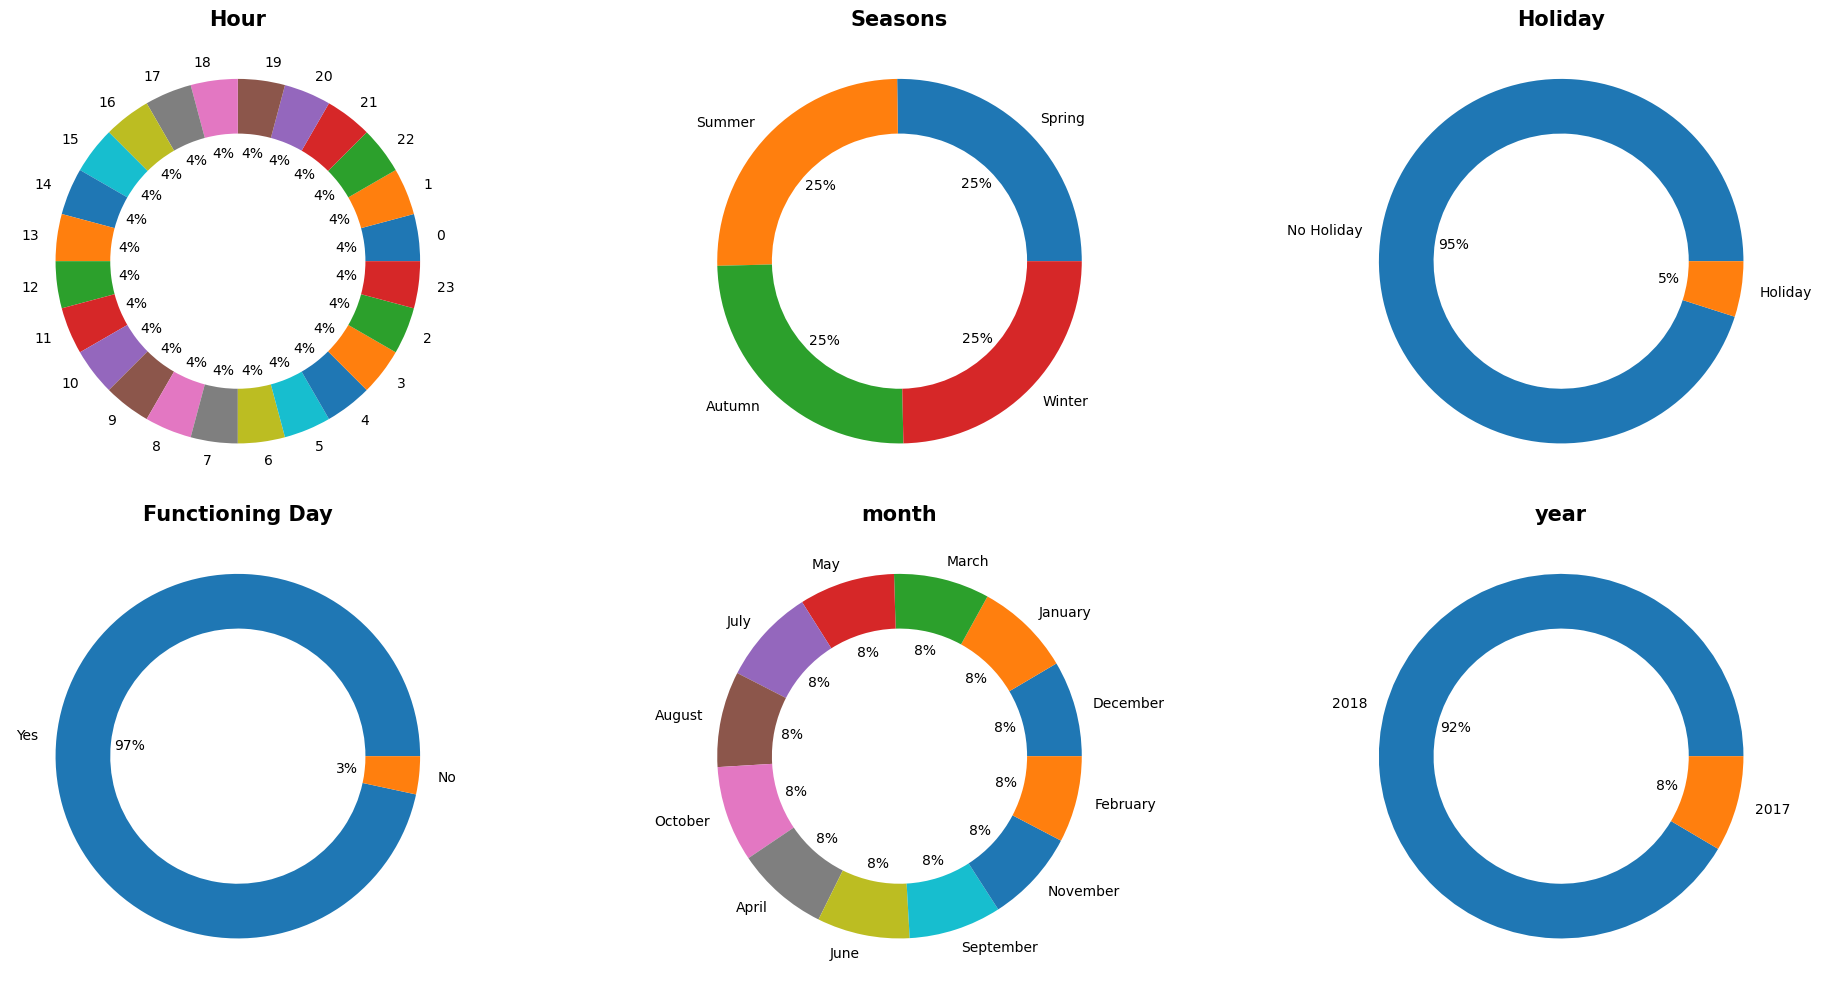

In [300]:
# creating pieplot for all categorical feature, visual representation of the above table
plt.figure(figsize=(20,15))
for index, category in enumerate(categorical_features.columns, 1):
    plt.subplot(3,3,index)
    value_counts = sb_df[category].value_counts()
    plt.pie(value_counts, labels = value_counts.index, autopct='%.0f%%', wedgeprops=dict(width=0.3))
    plt.title(category, fontweight='bold', fontsize=15)
    plt.tight_layout()



====================================================================Hour====================================================================




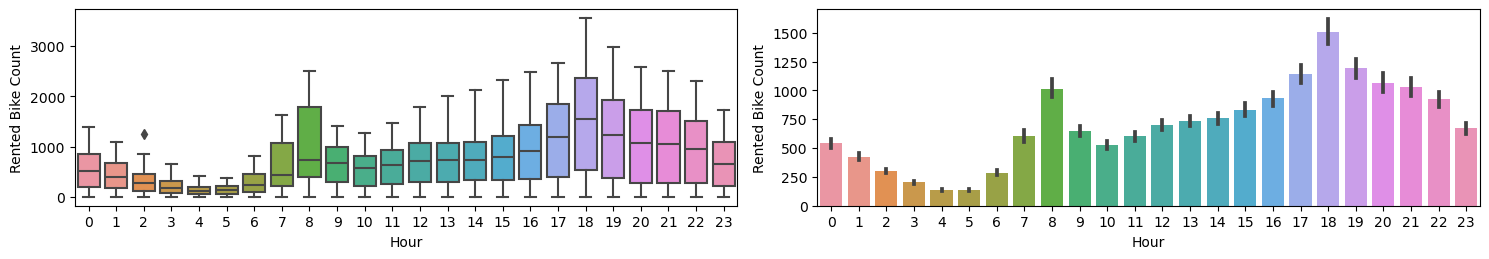



==================================================================Seasons===================================================================




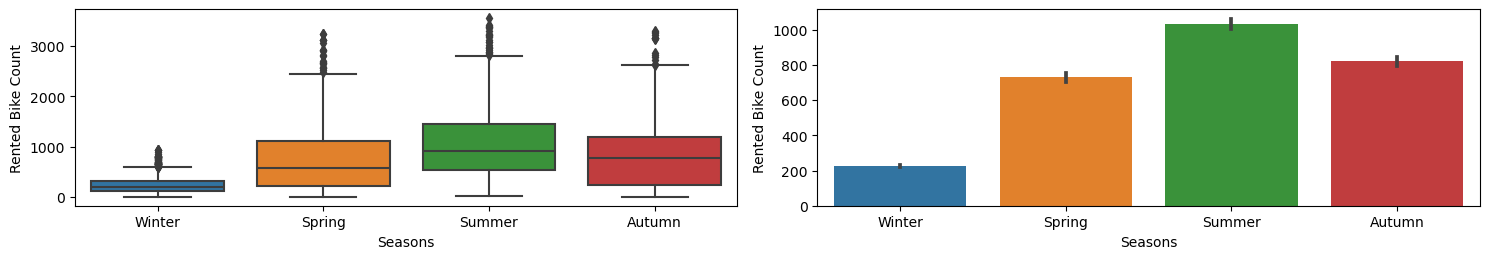



==================================================================Holiday===================================================================




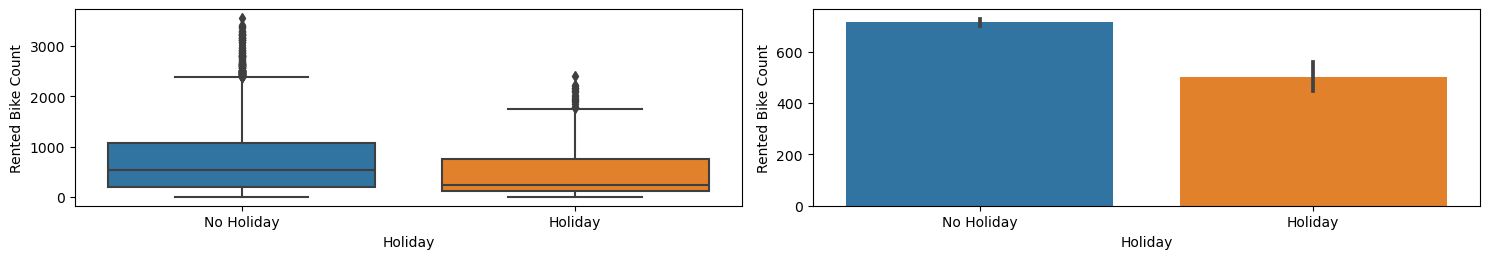



==============================================================Functioning Day===============================================================




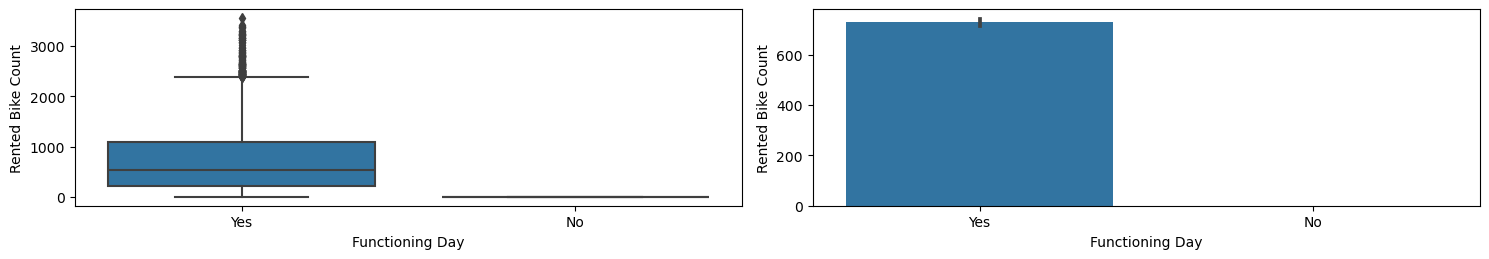



===================================================================month====================================================================




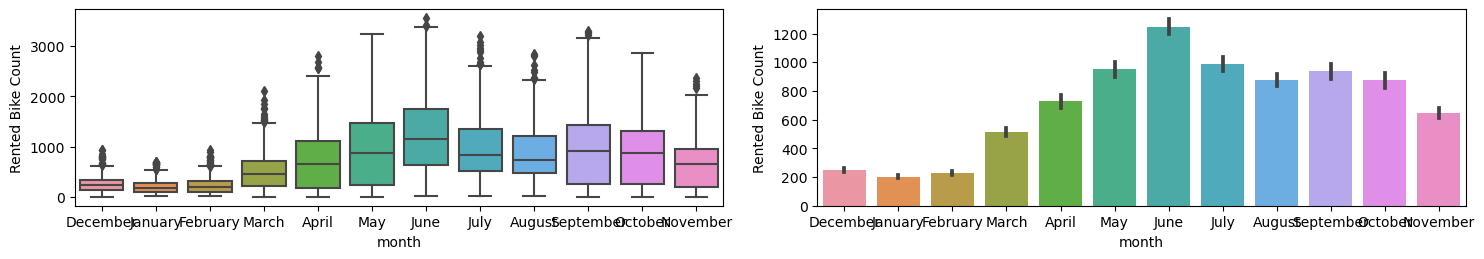



====================================================================year====================================================================




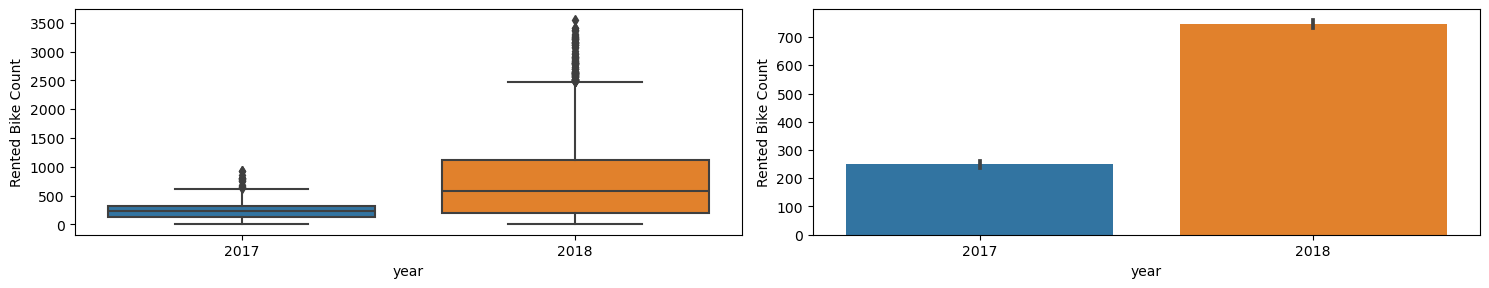

In [302]:
# creating boxplot plot and bar plot
n=1
for category in categorical_features.columns:
    plt.figure(figsize=(15,15))
    plt.subplot(6,2,n)
    n+=1
    print('\n')
    print(category.center(140, "="))
    print('\n')
    sns.boxplot(x=sb_df[category],y=sb_df["Rented Bike Count"])
    plt.subplot(6,2,n)
    n+= 1
    sns.barplot(x=sb_df[category],y=sb_df['Rented Bike Count'])
    plt.tight_layout()
    plt.show()

In [304]:
sb_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'year', 'week'],
      dtype='object')

## <b> 3. Does bike rental demand have any correlation with any other numerical features?</b>

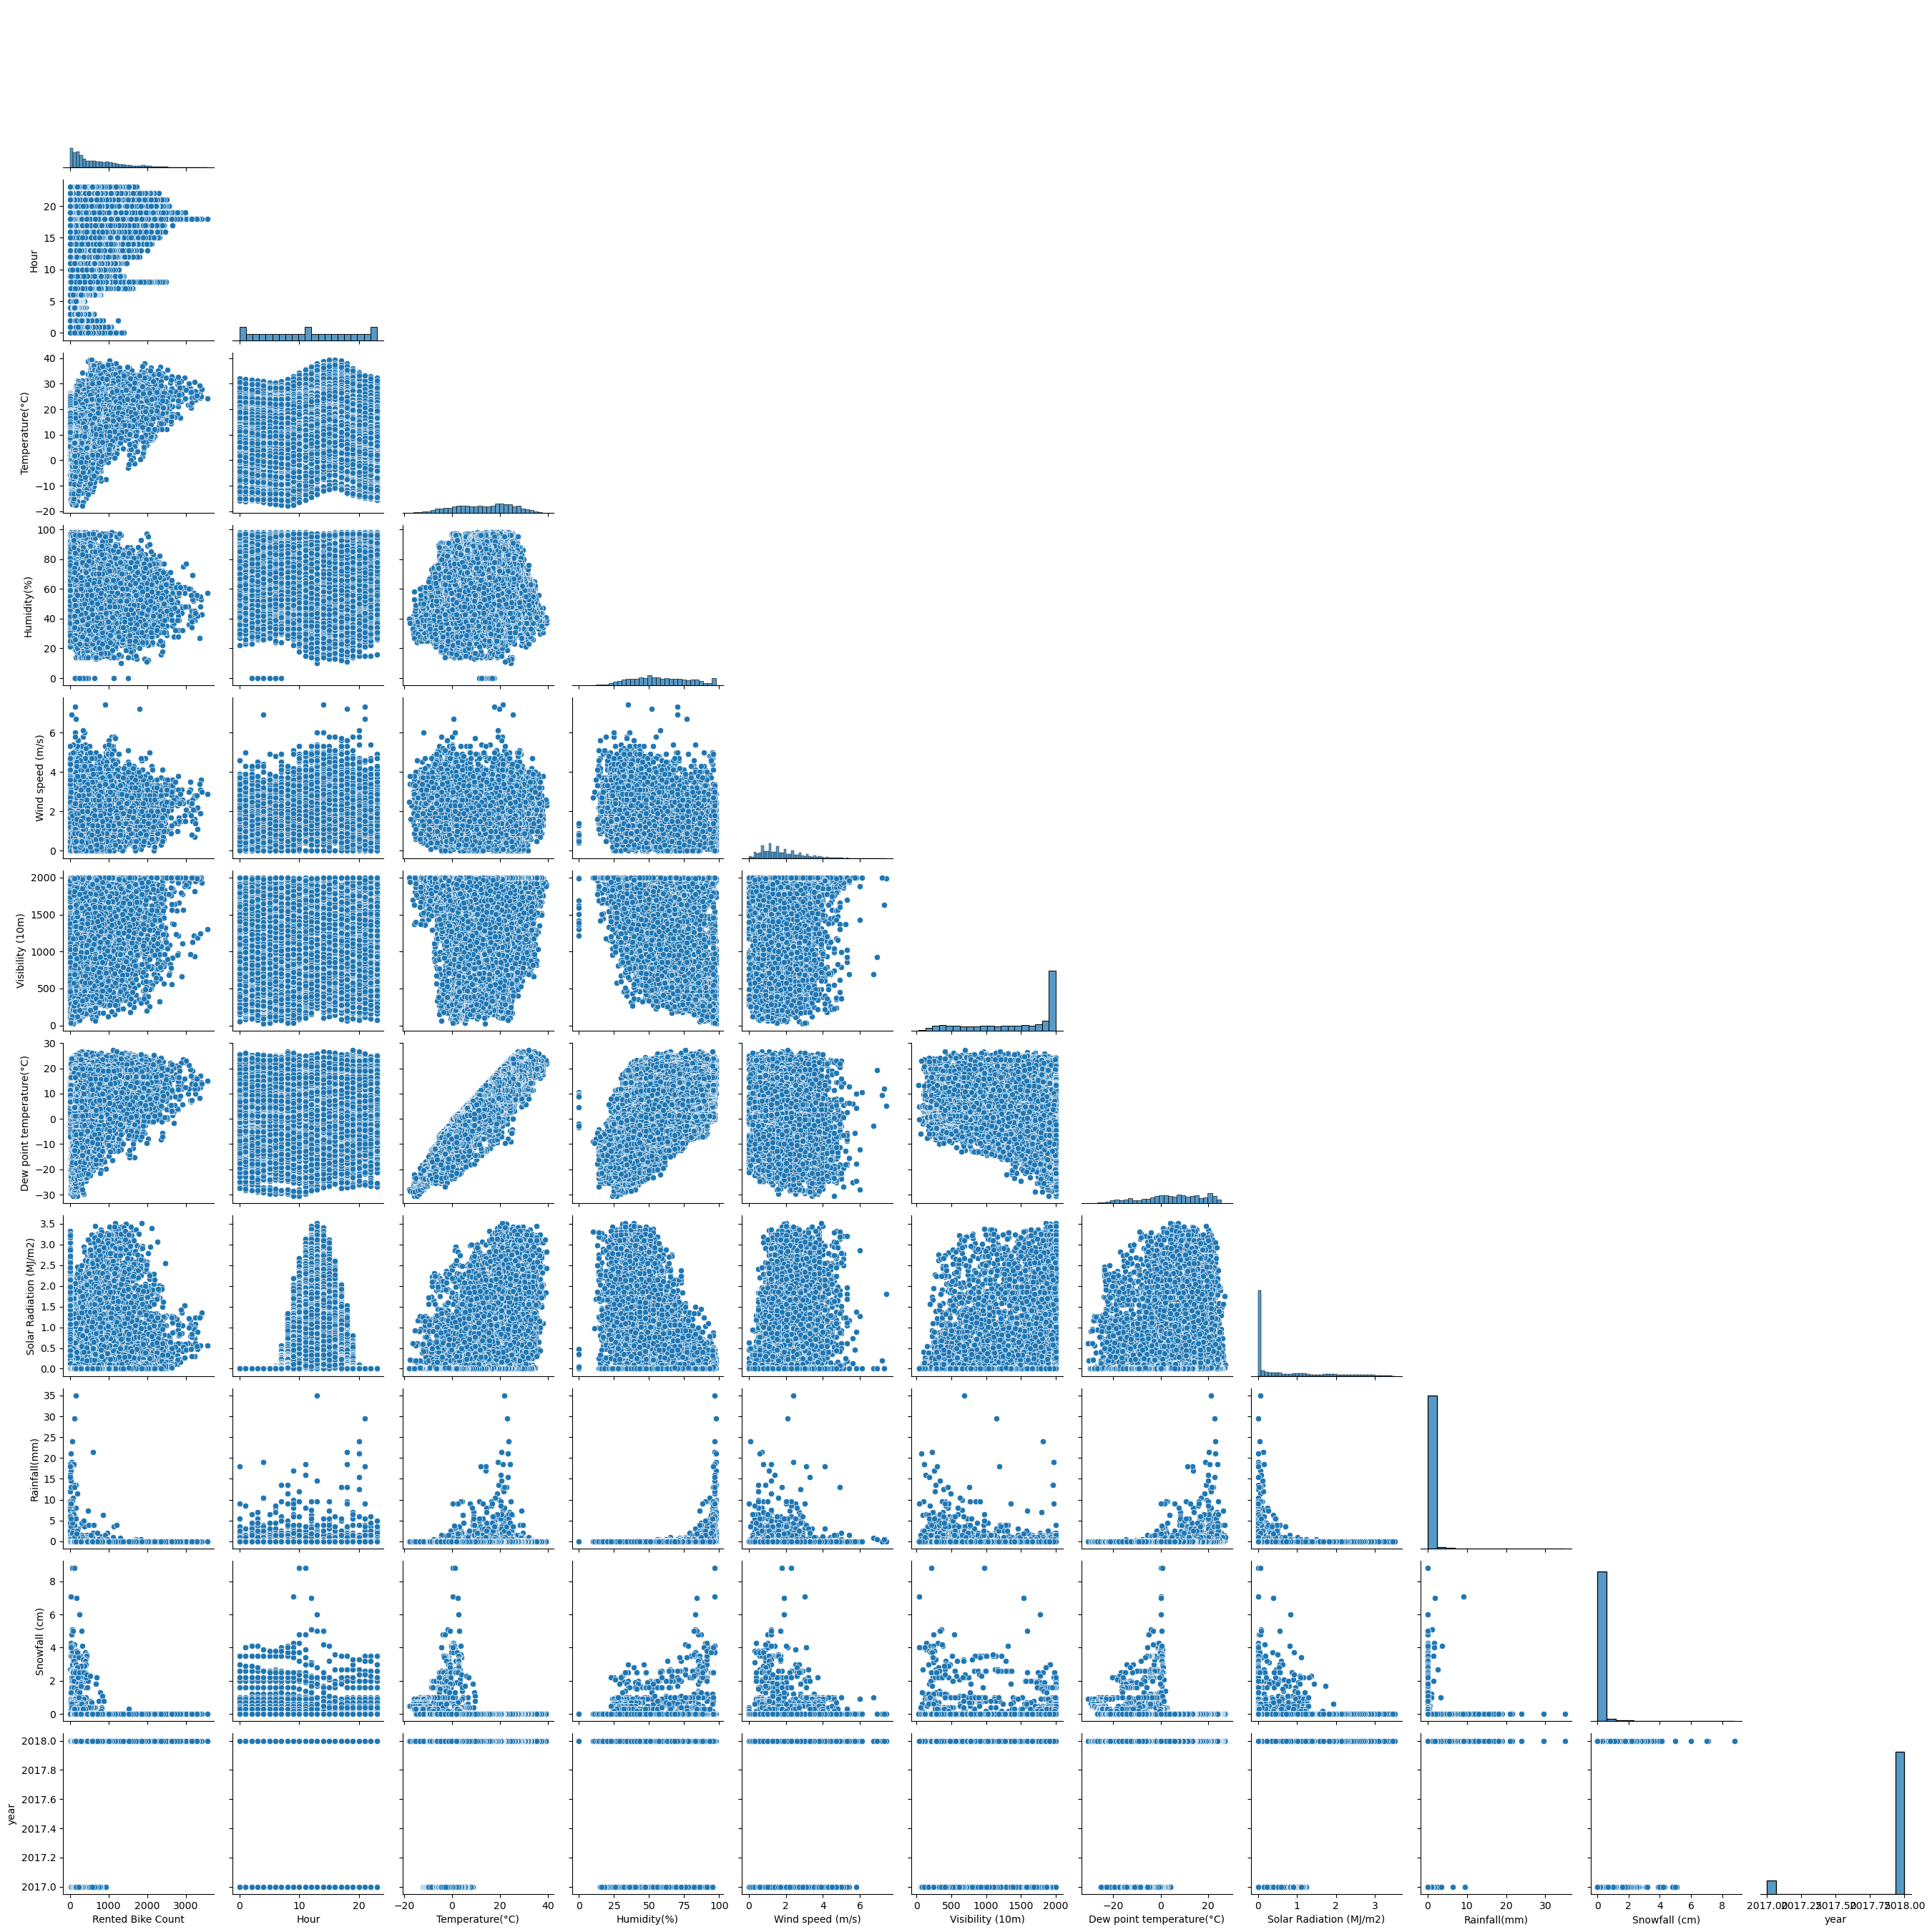

In [312]:
sns.pairplot(sb_df, corner=True)

<b>Observation</b>

Only Dew Point Temperature appears to have linearity with Temperature, but for Rented Bike Count, it appears to not have linear relation with any other numerical features

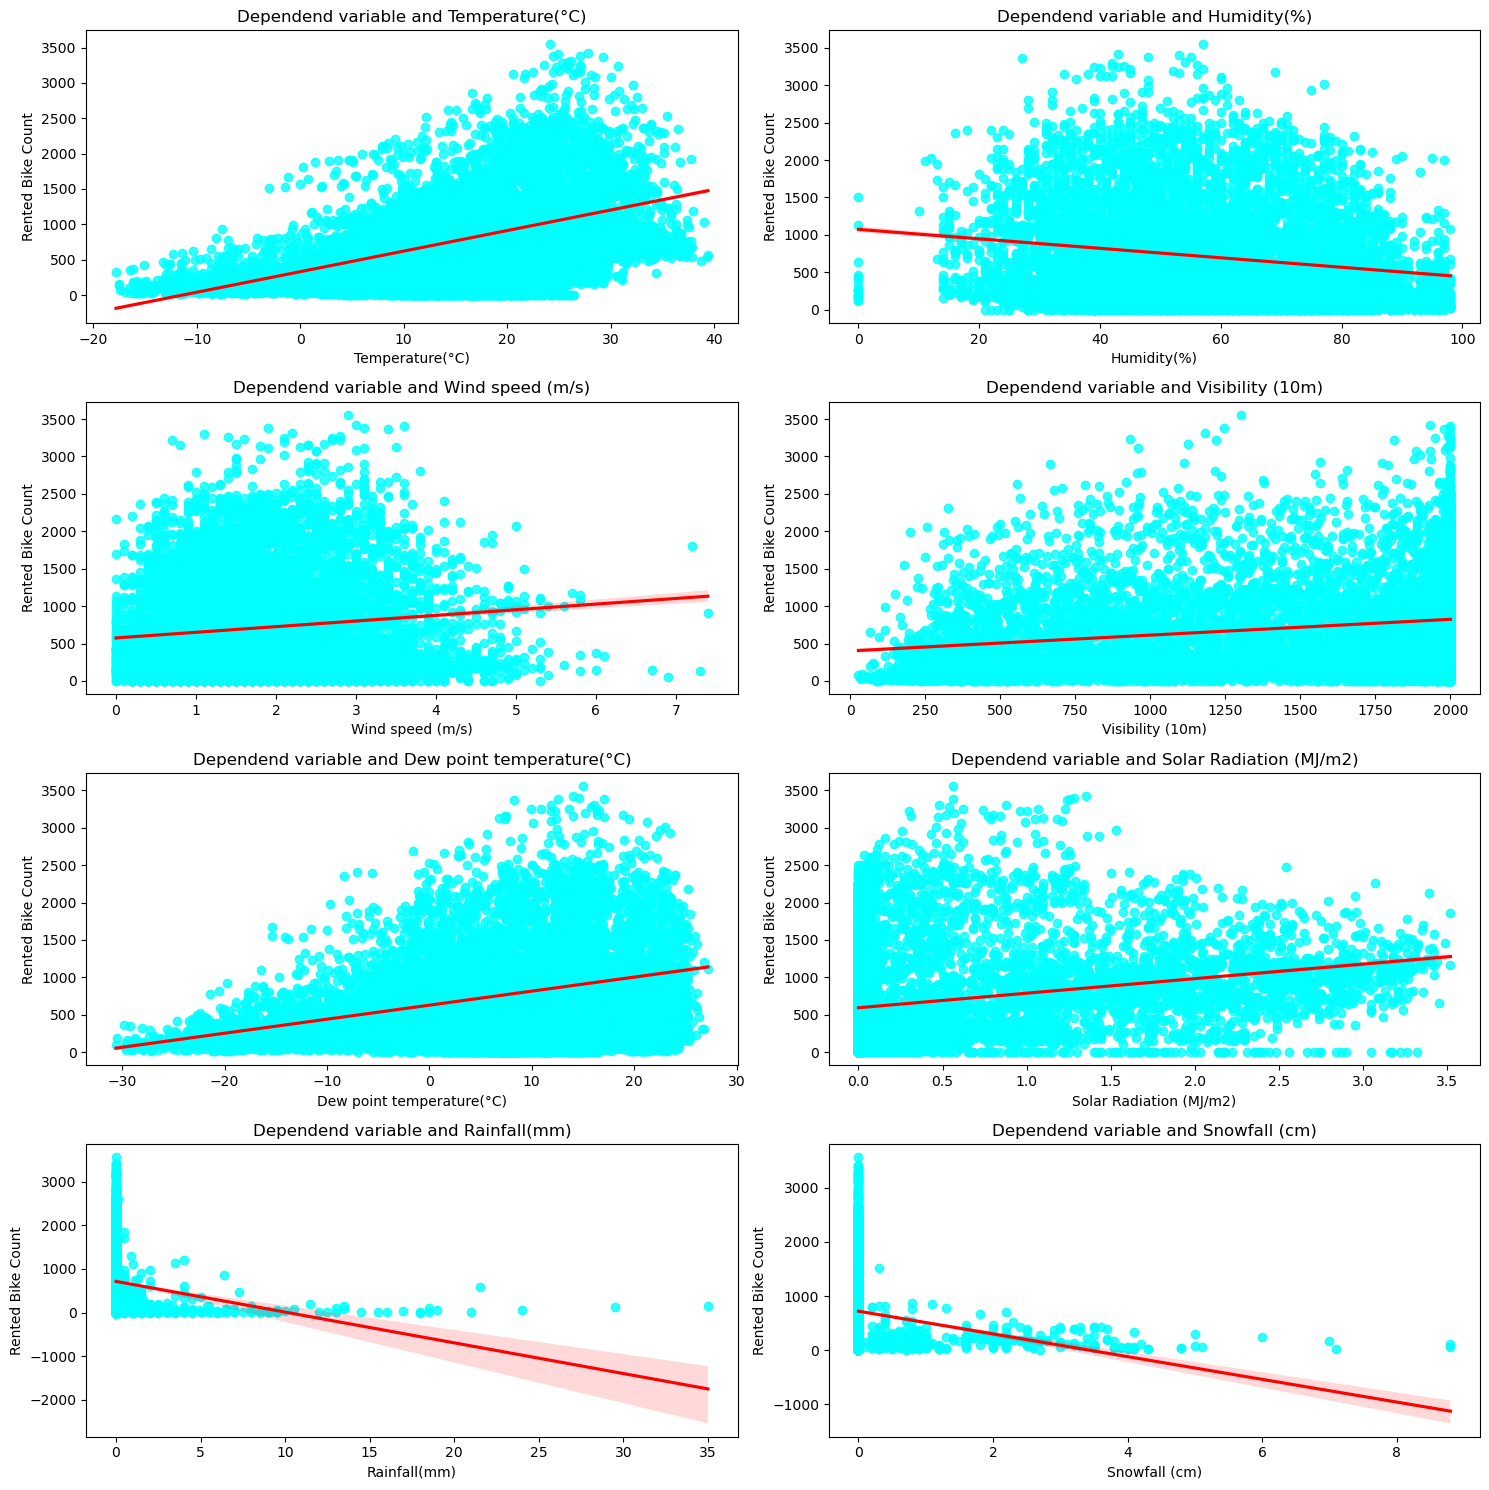

In [366]:
n=1
plt.figure(figsize=(15,15))
for num in numeric_features.columns:
  if num == 'Rented Bike Count':
    pass
  else:
    plt.subplot(4,2,n)
    n+=1
    sns.regplot(x=sb_df[num], y=sb_df['Rented Bike Count'],scatter_kws={"color": "cyan"}, line_kws={"color": "red"})
    plt.title(f'Dependend variable and {num}')
    plt.tight_layout()

<b>Observation</b>

This regression plots shows that some of the numerical features have positive linearity with bike count and some have negative linearity to bike count

In [327]:
# Correlation with Rented Bike Count
numeric_features.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Name: Rented Bike Count, dtype: float64

<Axes: >

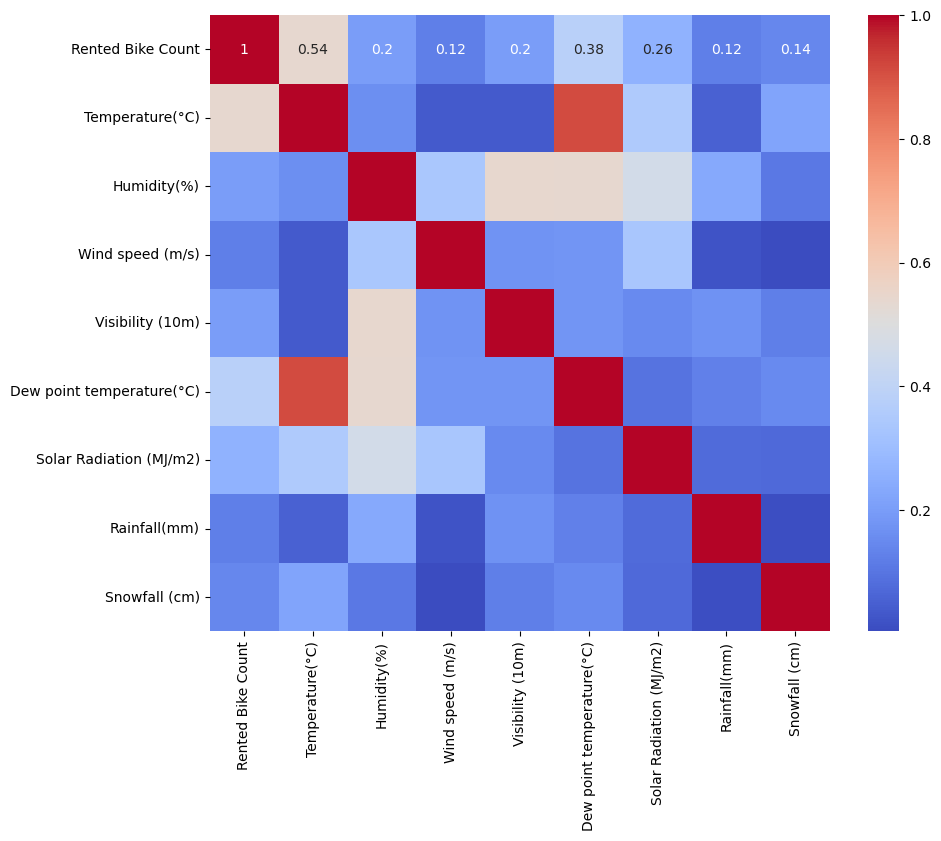

In [369]:
# using seaborn heatmap for ploting correlation graph 
plt.figure(figsize=(10,8))
sns.heatmap(abs(numeric_features.corr()), cmap='coolwarm', annot=True)

<b>Observation</b>

From this graph we are able to see that there is linearity in temperature(°C) and dev point temperatre(°C) column. 

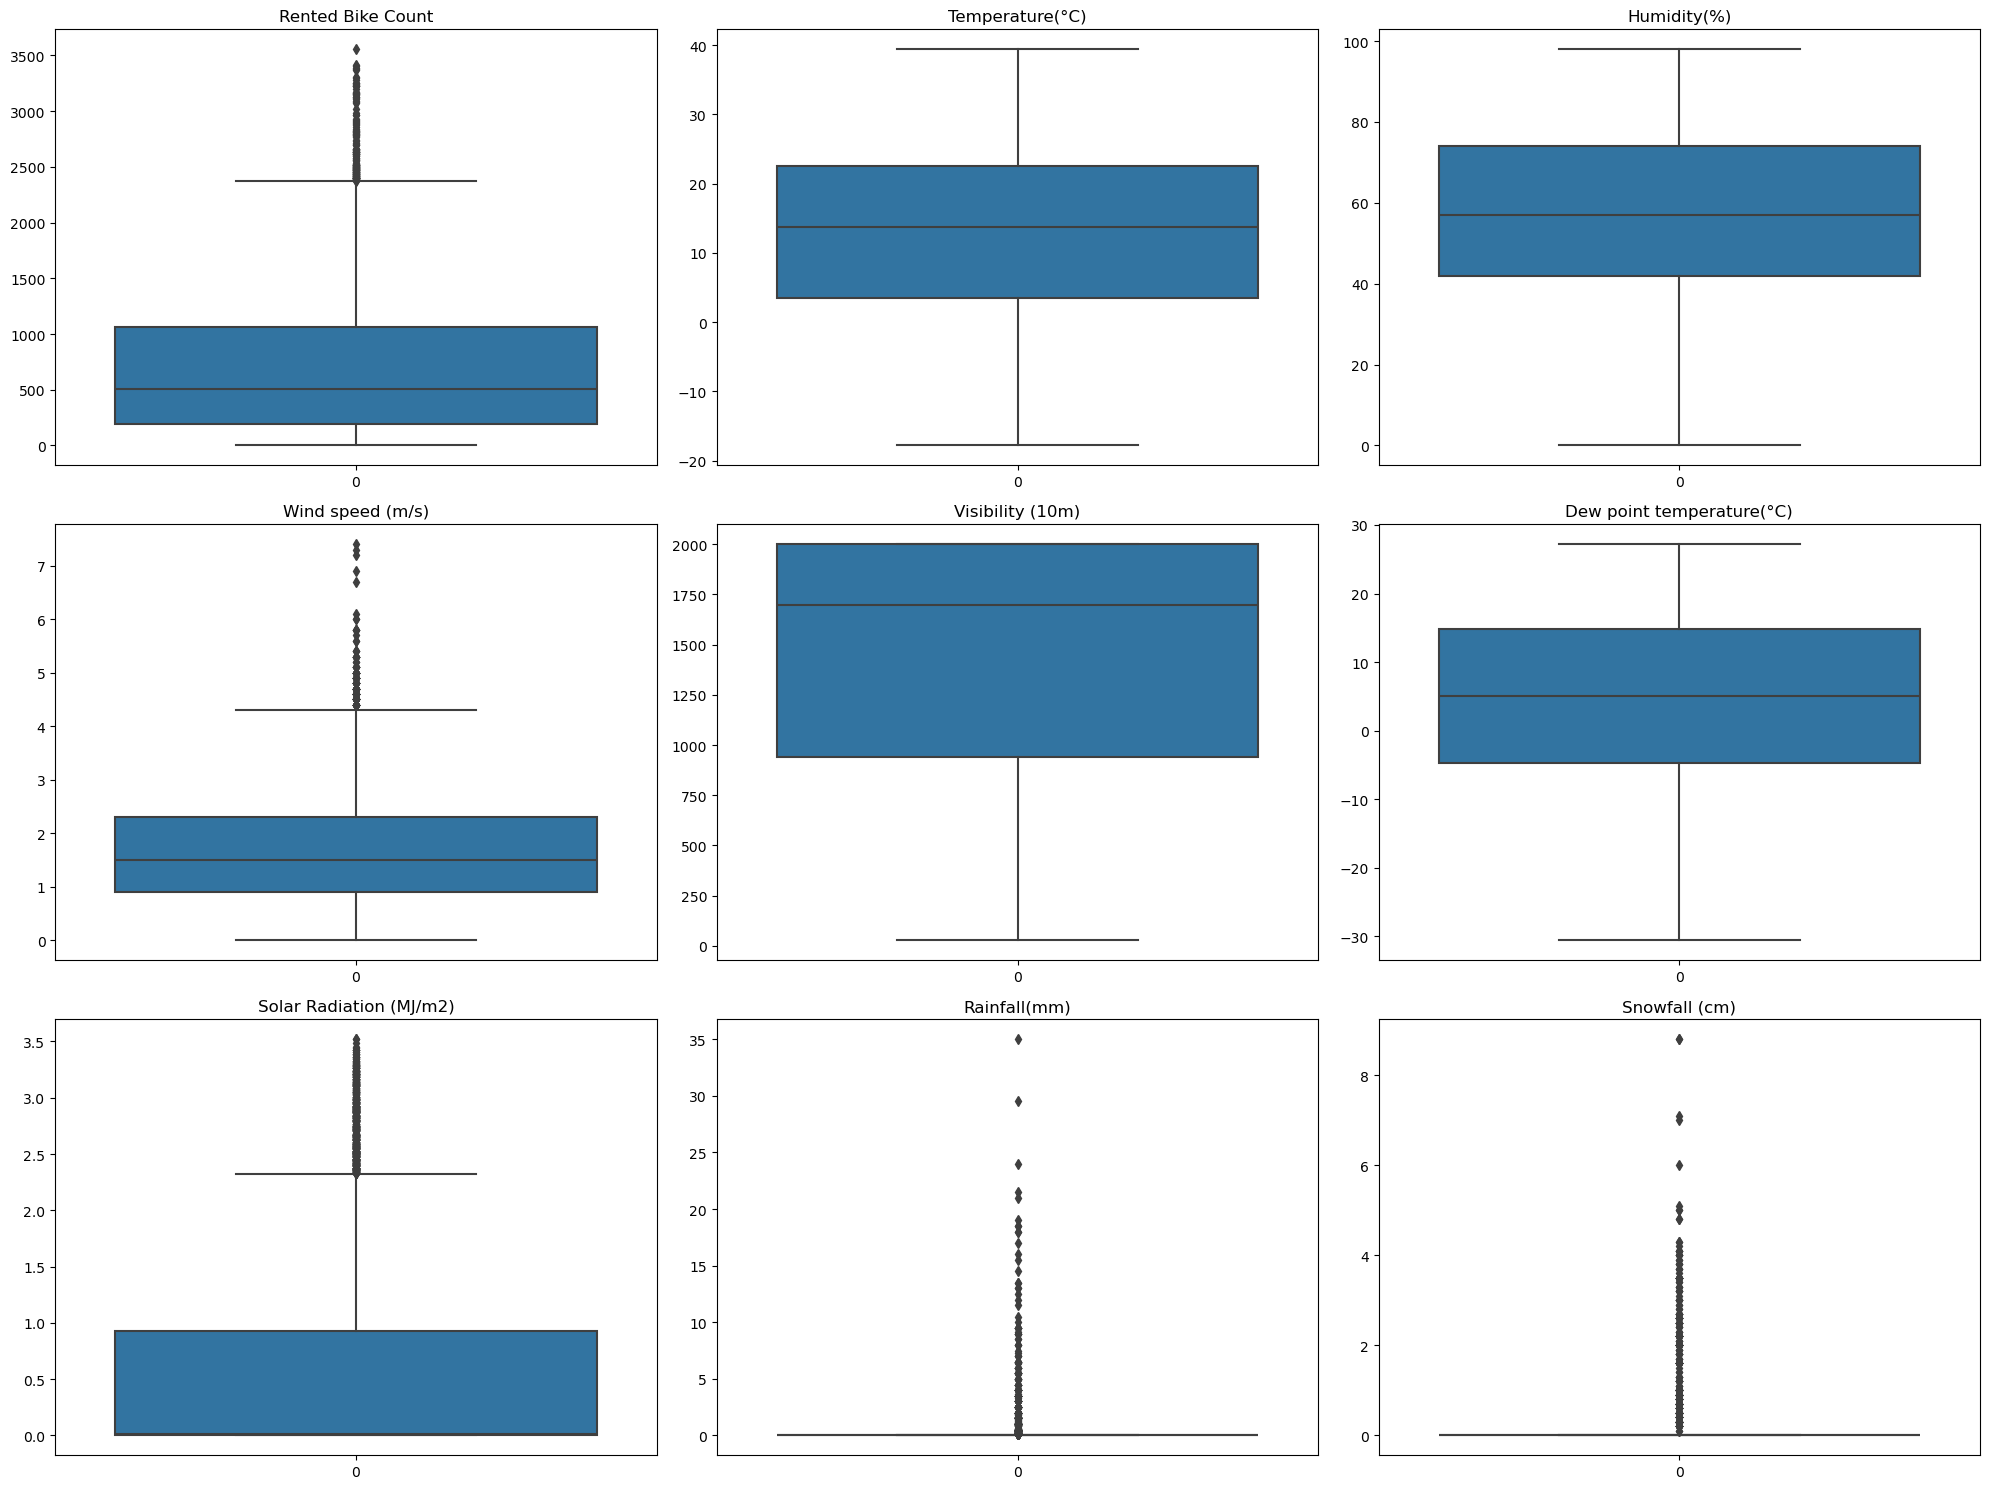

In [372]:
# checking Outliers with seaborn boxplot
plt.figure(figsize=(20,15))

for index, num in enumerate(numeric_features.columns, 1):
    plt.subplot(3,3,index)
    sns.boxplot(sb_df[num])
    plt.title(num)
    plt.tight_layout()

<b>Observation</b>

Outliers detected in Rent Bike Count, Rainfall and Snowfall. Did not use last 2 columns, can ignore outliers. High values in bike count due to seasonal pattern as explained above. Not a statistical error. Outliers causes skew distribution, can impact ML model

## <b>Further steps</b>

1. Normalise the skewed data
2. Choose Predictive ML model
3. Evaluate model using Train/Test data and cross validate
4. Improve model performance